## Aula: aceleração da gravidade de uma massa esférica

Nesse notebook usamos:

$\frac{G M_s * z}{(x^2 + z^2)}$

Para calcular a aceleração da gravidade de um corpo esférico em diferentes profundidades e posteriormente as suas derivadas (analiticamente e numéricamente).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def g_esfera(delta_rho, depth, position_x, radius):
  G = 6.674184E-11
  M =  4/3 * np.pi *  delta_rho * radius **3
  g_esfera = G * M * depth / ((depth ** 2 + position_x ** 2) ** (3/2))
  return g_esfera * 1e5

In [ ]:
dx = 5
x = np.arange(-.5e3, .5e3, dx)
#Parametro da esfera
depths = [100, 200, 300] #Distância da superfície até o centro da esfera (m)
radius = 50 #m
delta_rho = 2000 #Kg/m3

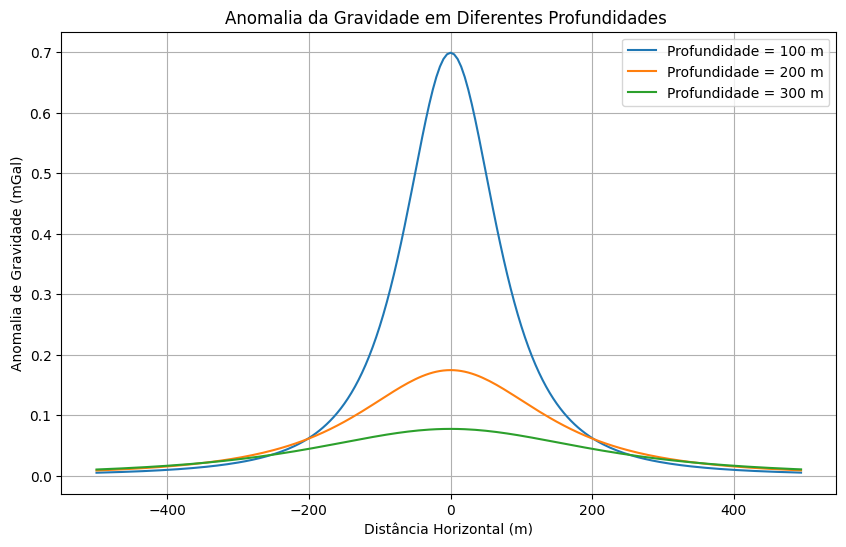

In [ ]:
plt.figure(figsize=(10, 6))

for depth in depths:
    aceleracoes = []
    for position_x in x:
        anomalia = g_esfera(delta_rho, depth, position_x, radius)
        aceleracoes.append(anomalia)

    plt.plot(x, aceleracoes, label=f'Profundidade = {depth} m')

plt.title('Anomalia da Gravidade em Diferentes Profundidades ')
plt.xlabel('Distância Horizontal (m)')
plt.ylabel('Anomalia de Gravidade (mGal)')
plt.legend()
plt.grid(True)
plt.show()

## 1ª Derivada

In [ ]:
def frist_d(delta_rho, depth, position_x, radius):
    G = 6.674184E-11
    M =  4/3 * np.pi *  delta_rho * radius **3
    frist_d = - 3 * G * M * position_x * depth / ((depth ** 2 + position_x ** 2) ** (5/2))
    return frist_d * 1e5

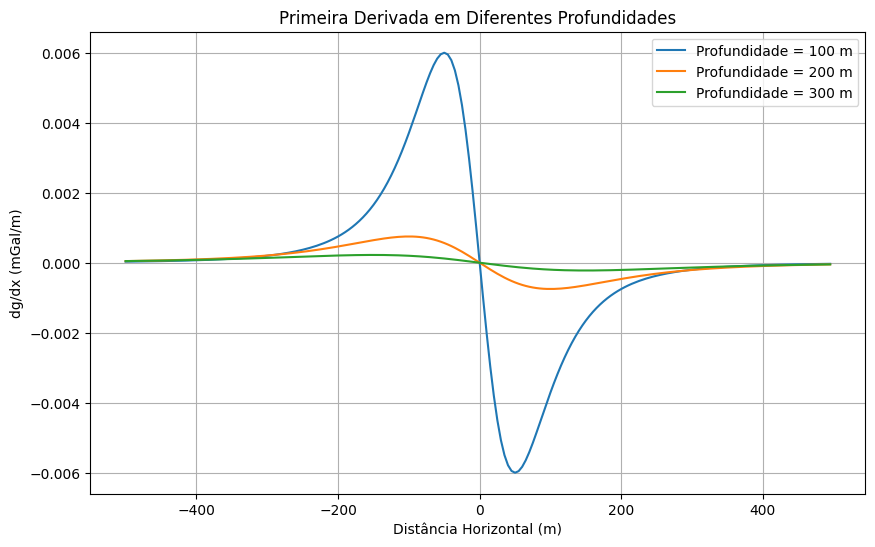

In [ ]:
plt.figure(figsize=(10, 6))

for depth in depths:
    devs = []
    for position_x in x:
        derivada = frist_d(delta_rho, depth, position_x, radius)
        devs.append(derivada)

    plt.plot(x, devs, label=f'Profundidade = {depth} m')

plt.title('Primeira Derivada em Diferentes Profundidades')
plt.xlabel('Distância Horizontal (m)')
plt.ylabel('dg/dx (mGal/m)')
plt.legend()
plt.grid(True)
plt.show()

2ª Derivada

In [ ]:
def second_d(delta_rho, depth, position_x, radius):
    G = 6.674184E-11
    M =  4/3 * np.pi *  delta_rho * radius **3
    second_d = - 3 * G * M  * (- 4 * position_x ** 2 + depth ** 2) * depth / ((depth ** 2 + position_x ** 2) ** (7/2))
    return second_d * 1e5

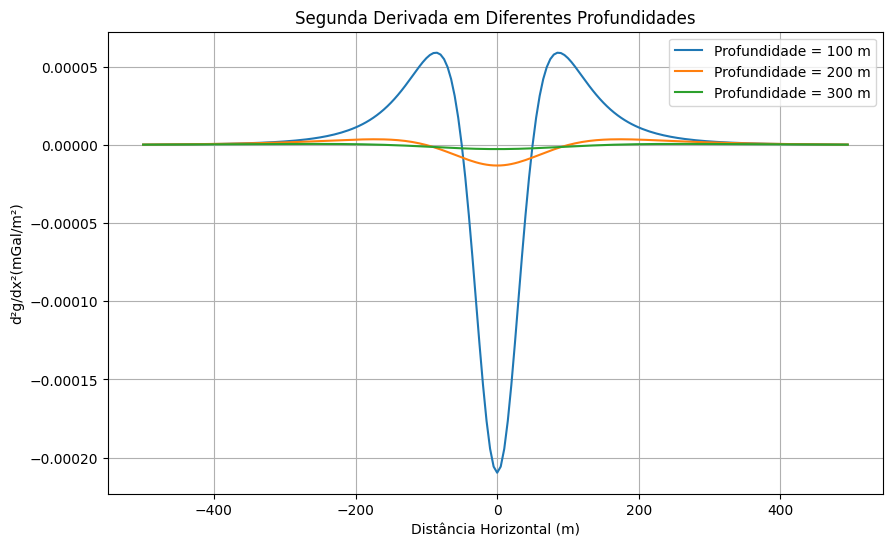

In [ ]:
plt.figure(figsize=(10, 6))

for depth in depths:
    devs2 = []
    for position_x in x:
        derivada = second_d(delta_rho, depth, position_x, radius)
        devs2.append(derivada)
    plt.plot(x, devs2, label=f'Profundidade = {depth} m')

plt.title('Segunda Derivada em Diferentes Profundidades')
plt.xlabel('Distância Horizontal (m)')
plt.ylabel('d²g/dx²(mGal/m²)')
plt.legend()
plt.grid(True)
plt.show()

# Derivadas Numéricas
## Primeira derivada numérica

In [ ]:
def numeric_1d(g, x):
    g_array = np.array(g)
    x_array = np.array(x)

    dx = x_array[1] - x_array[0]

    derivative_values = (g_array[1:] - g_array[:-1]) / (dx)

    return derivative_values

In [ ]:
#100m
aceleracoes100 = []
for i in range(len(x)):
  g = g_esfera(delta_rho, 100, x[i], radius)
  aceleracoes100.append(g)

g_array1 = np.array(aceleracoes100)

noise_level = np.max(g_array1)* 0.001
noise = np.random.normal(0,noise_level, len(g_array1))
g_array1 += noise

#200m
aceleracoes200 = []
for i in range(len(x)):
  g = g_esfera(delta_rho, 200, x[i], radius)
  aceleracoes200.append(g)

g_array2 = np.array(aceleracoes200)

noise_level = np.max(g_array2)* 0.001
noise = np.random.normal(0,noise_level, len(g_array2))
g_array2 += noise


#300m
aceleracoes300 = []
for i in range(len(x)):
  g = g_esfera(delta_rho, 300, x[i], radius)
  aceleracoes300.append(g)

g_array3 = np.array(aceleracoes300)

noise_level = np.max(g_array3)* 0.001
noise = np.random.normal(0,noise_level, len(g_array3))
g_array3 += noise

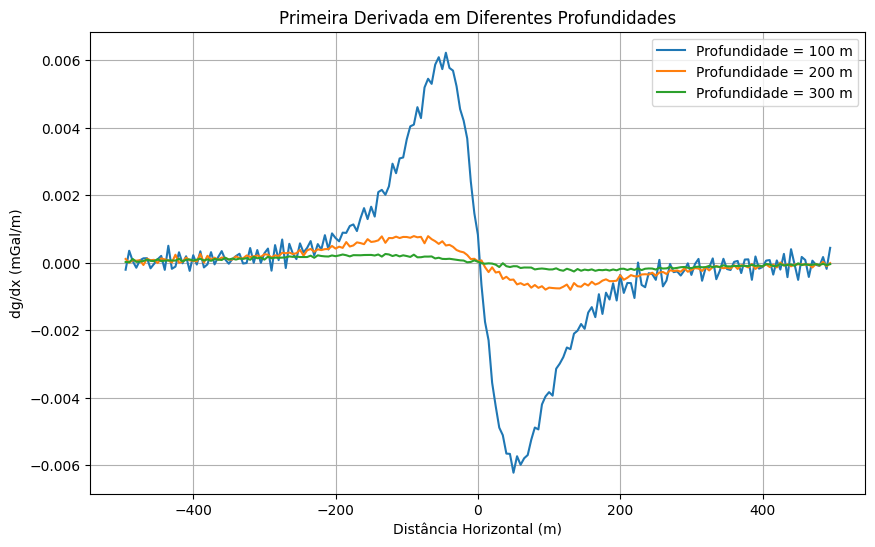

In [ ]:
anomalies_data = [
    {'data': g_array1, 'depth': 100},
    {'data': g_array2, 'depth': 200},
    {'data': g_array3, 'depth': 300}
]


plt.figure(figsize=(10, 6))

for item in anomalies_data:

    derivada_numerica = numeric_1d(item['data'], x)
    plt.plot(x[1:], derivada_numerica, label=f'Profundidade = {item["depth"]} m')


plt.title('Primeira Derivada em Diferentes Profundidades')
plt.xlabel('Distância Horizontal (m)')
plt.ylabel('dg/dx (mGal/m)')
plt.legend()
plt.grid(True)
plt.show()

## Segunda derivada numérica

In [ ]:
def numeric_2d(g, x):
    g_array = np.array(g)
    x_array = np.array(x)

    derivada1_numerica = numeric_1d(g, x)

    derivative_values = (derivada1_numerica[1:] - derivada1_numerica[:-1]) / dx

    return derivative_values

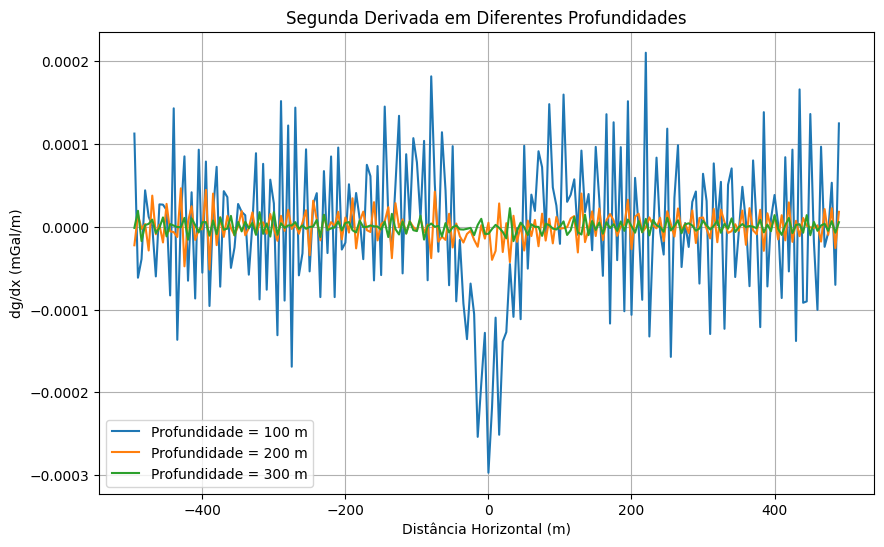

In [ ]:
plt.figure(figsize=(10, 6))

for item in anomalies_data:

    derivada_numerica = numeric_2d(item['data'], x)
    plt.plot(x[1:-1], derivada_numerica, label=f'Profundidade = {item["depth"]} m')


plt.title('Segunda Derivada em Diferentes Profundidades')
plt.xlabel('Distância Horizontal (m)')
plt.ylabel('dg/dx (mGal/m)')
plt.legend()
plt.grid(True)
plt.show()

# Método da meia largura

$z = \frac{4}{3} x $

In [ ]:
arrays = [g_array1, g_array2, g_array3]


profundiades = []
for item in arrays:
    max = np.max(item)
    meio = max/2
    indice = np.argmin(np.abs(item - meio))
    z = (4/3) * x[indice]
    profundiades.append(z)


print(profundiades)

[np.float64(100.0), np.float64(-206.66666666666666), np.float64(306.66666666666663)]
